In [1]:
import sys
sys.path.append('../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'credit'
X = pd.read_csv('data/german_credit.csv')
target = X.pop('Creditability')
X['Target']=target
X = X.dropna(axis=0)
ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("Target")]
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Target
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,-0.428290,-0.823318,-0.196014,1.0
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,2.334869,-0.823318,-0.196014,1.0
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014,1.0
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,2.334869,-0.823318,5.101669,1.0
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,-0.428290,-0.823318,5.101669,1.0


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.33, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    het_decoder=False,
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=0.1,
    seed=0
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=21, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=21, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=21, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (activation): Tanh()
        (fc_self): Linear(in_features=64, out_features=32, bias=False)
        (fc_neigh): Linear(in_features=64, out_features=32, bias=False)
      )
      (1): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (fc_self): Linear(in_features=32, out_features=1, bias=False)
        (fc_neigh): Linear(in_features=32, out_features=1, bias=False)
      )
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch  50/1000, patience  2] train: 14.980, val: 15.760
[Epoch 100/1000, patience 15] train: 14.664, val: 15.409
[Epoch 150/1000, patience  8] train: 14.548, val: 14.925
[Epoch 200/1000, patience  9] train: 14.461, val: 15.261
[Epoch 250/1000, patience 46] train: 14.453, val: 14.782
Training terminated after 253 epochs


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Target
0,1.132053,-0.567525,0.420293,-0.499211,-0.750442,0.566731,0.510060,0.918477,0.449326,-0.303686,...,-0.341055,0.112548,-0.957110,0.135869,1.027079,-1.383771,2.334869,1.214598,-0.196014,1.0
1,1.132053,-0.143827,-0.503428,0.356607,0.485115,-0.066488,0.510060,-0.870183,0.449326,-0.303686,...,-0.341055,-0.499027,0.460831,0.135869,-0.704926,0.146949,-0.428290,1.214598,-0.196014,1.0
2,0.336513,0.740802,-1.427149,2.491228,1.474131,-0.699707,0.510060,-0.870183,0.449326,-0.303686,...,0.611613,-0.498820,0.460831,0.135869,-0.704926,0.146949,-0.428290,-0.823318,-0.196014,1.0
3,1.132053,-0.846707,0.420293,0.747279,-0.767890,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,-0.429684,0.460831,0.135869,-0.704926,0.146949,-0.428290,1.214598,-0.196014,1.0
4,-0.459026,-0.055377,-0.503428,-0.280551,-0.012807,1.833169,-0.317959,0.024147,-0.963650,-0.303686,...,-0.341055,0.975627,0.460831,0.135869,-0.704926,-1.383771,2.334869,-0.823318,-0.196014,1.0


In [7]:
res = gen.evaluate_synthetic(X_synth, X_test)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.587
Detection: 0.697
Performance on real: 0.782, on synth: 0.752


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'Target'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

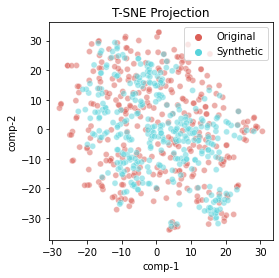

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

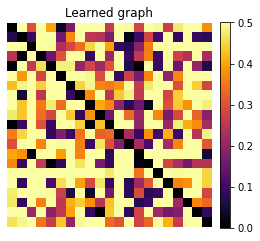

In [11]:
adj_matrix = gen.model.learned_graph(None).cpu().detach().numpy()
adj_matrix = np.abs(adj_matrix)
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=0.5)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()